In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost_,random_forest
importlib.reload(xgboost_)
importlib.reload(random_forest)
from xgboost_ import XGBoostModel,save_model,barrido_parametrico
from func_preprocesamiento import preprocesar
from random_forest import rf

In [2]:
# pruebas_train = pd.read_csv('../Dataset/Procesado/pruebas.csv')
# pruebas_val = pd.read_csv('../Dataset/Procesado/pruebas_val.csv')

# X_train_prueba = pruebas_train.drop(columns=['precio_pesos_constantes'])
# y_train_prueba = pruebas_train['precio_pesos_constantes']

# X_val_prueba = pruebas_val.drop(columns=['precio_pesos_constantes'])
# y_val_prueba =pruebas_val['precio_pesos_constantes']


In [2]:
df_train = pd.read_csv('../Dataset/Procesado/train_procesado_lim.csv')
df_validation = pd.read_csv('../Dataset/Procesado/val_procesado_lim.csv')

X_train = df_train.drop(columns=['precio_pesos_constantes'])
y_train = df_train['precio_pesos_constantes']

X_val = df_validation.drop(columns=['precio_pesos_constantes'])
y_val =df_validation['precio_pesos_constantes']

In [ ]:

model = rf(X_train,X_val,y_train,y_val)


# # Métricas
# print("R2 Score:", r2_score(y_X_val_procesado = pruebas_val.drop(columns=['precio_pesos_constantes'])
# y_val_procesado =pruebas_val['precio_pesos_constantes']val, y_pred))
# print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))


R2 Score: 0.8326114619348678


TypeError: got an unexpected keyword argument 'squared'

In [4]:
XGboost = XGBoostModel()
XGboost.fit(X_train,y_train)
y_pred = XGboost.predict(X_val)

rmse, r2 = XGboost.evaluate(y_val,y_pred)
save_model(XGboost)

Model training completed.
RMSE: 4288.227053124445
R2 score: 0.8032669189484103


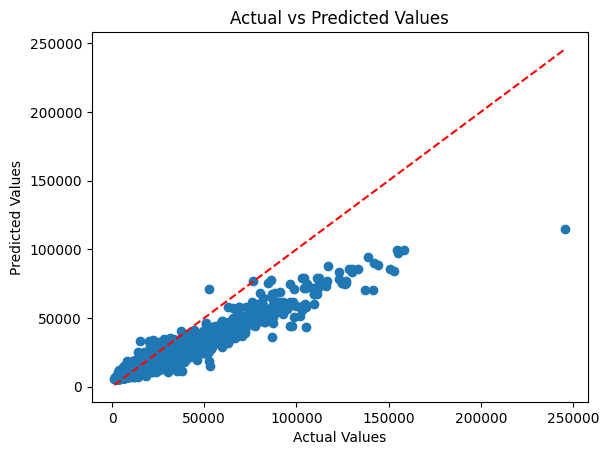

In [6]:
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [7]:
#Ahora probamos con test
df_test = pd.read_csv('../Dataset/raw/alquiler_AMBA_test.csv')
df_test = preprocesar(df_test, 'test')
# X_test = df_test.drop(columns=['precio_pesos_constantes'])
# y_test = df_test['precio_pesos_constantes']

y_pred = XGboost.predict(df_test)

#rmse, r2 = XGboost.evaluate(y_test, y_pred)

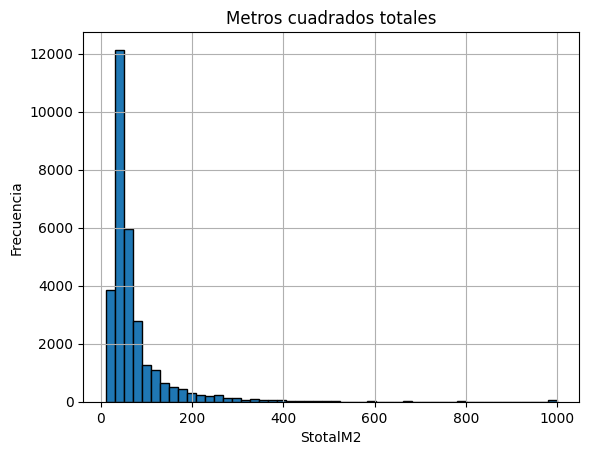

In [8]:
df_test['STotalM2'].hist(bins=50, edgecolor='black')
plt.xlabel('StotalM2')
plt.ylabel('Frecuencia')
plt.title('Metros cuadrados totales')
plt.show()

In [9]:
#Ahora probamos con test
df_test_nuestro = pd.read_csv('../Dataset/raw/test_lim.csv')
df_test_nuestro = preprocesar(df_test_nuestro, 'test')
X_test = df_test_nuestro.drop(columns=['precio_pesos_constantes'])
y_test = df_test_nuestro['precio_pesos_constantes']

y_pred = XGboost.predict(X_test)

rmse, r2 = XGboost.evaluate(y_test, y_pred)

RMSE: 4171.458466010204
R2 score: 0.8096215656681823


In [10]:

y_pred = pd.DataFrame(y_pred, columns=['predicciones'])
y_pred.to_csv('../Dataset/Procesado/predicciones.csv', index=False)
df_test['id'] = df_test.index
result = pd.concat([df_test['id'], y_pred], axis=1)
result.to_csv('../Dataset/Procesado/predicciones.csv', index=False)

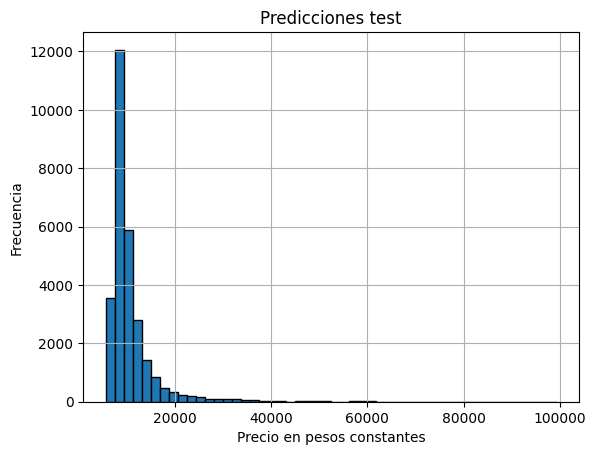

In [11]:
result['predicciones'].hist(bins=50, edgecolor='black')
plt.xlabel('Precio en pesos constantes')
plt.ylabel('Frecuencia')
plt.title('Predicciones test')
plt.show()